   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

Saving image3.jpeg to image3.jpeg
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete
🔹 Extracted Text (Preserving Line Breaks):

ARQ detail in
ARQ Automatic A
Repeat R
Request =
ARQ also knoln Aubomatic Repeal as
Query is metod an contol exror
data for transmission Hat Uses
acknouledgements
fmeauts and to
achieve_ reliable data transmissian
unreliable_ Over service_ an
sender does If not receive an
ackouledgement tmeout before ten He
It tansmits fame e untiL #e packet
te sender acknolledgement receives
al
Ihe types Protocols Of Arq axe
Stop and wait Arq 1)
610 ARQ 2) back_ N
Selective_Qepeat_Arq 3)
protocol reside in the These Data Link
HodeL Transport te Layer Of OST OX


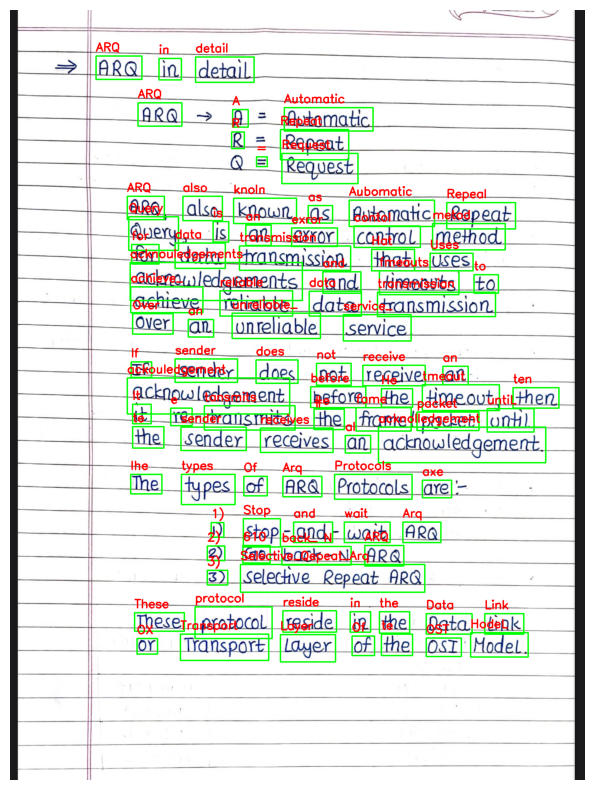

In [1]:
# Install necessary libraries (run only once)
!pip install easyocr
!pip install opencv-python-headless
!pip install matplotlib
!pip install numpy

import easyocr
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
from PIL import Image

def extract_text(image_path, languages=['en']):
    """
    Extracts text from an image using EasyOCR while preserving original line breaks.

    Args:
        image_path (str): Path to the image file.
        languages (list): List of languages to recognize.

    Returns:
        list: A list of lines with text.
    """
    reader = easyocr.Reader(languages)
    results = reader.readtext(image_path)

    # Sort results by y-coordinate (line-wise sorting)
    results.sort(key=lambda x: x[0][0][1])  # Sort based on top-left y-coordinate

    # Group words into lines based on y-coordinate proximity
    lines = []
    current_line = []
    threshold = 15  # Adjusting threshold for better grouping

    prev_y = None  # Initialize previous y-coordinate

    for bbox, text, prob in results:
        top_left_y = bbox[0][1]  # Get y-coordinate of the top-left point

        if prev_y is None or abs(top_left_y - prev_y) < threshold:
            current_line.append(text)  # Add word to the current line
        else:
            lines.append(" ".join(current_line))  # Add the previous line to the list
            current_line = [text]  # Start a new line

        prev_y = top_left_y  # Update y-coordinate reference

    # Append the last line
    if current_line:
        lines.append(" ".join(current_line))

    return lines, results  # Return both lines and raw results

def display_image_with_boxes(image_path, results):
    """
    Displays the image with bounding boxes around detected text.

    Args:
        image_path (str): Path to the image file.
        results (list): OCR results from EasyOCR.
    """
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for bbox, text, prob in results:
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))

        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
        cv2.putText(image, text, (top_left[0], top_left[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Upload an image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Extract text with line breaks
ocr_lines, ocr_results = extract_text(image_path, ['en'])

# Print extracted text preserving line breaks
print("\n🔹 Extracted Text (Preserving Line Breaks):\n")
for line in ocr_lines:
    print(line)  # Prints text exactly as written in the image

# Display image with detected text
display_image_with_boxes(image_path, ocr_results)
